In [ ]:
#分析に必要なライブラリ、モジュールをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import urllib.request
from io import StringIO
#回帰分析で使うライブラリ
import statsmodels.formula.api as smf 
#scikit-Learnで使うもの
from sklearn.impute import SimpleImputer #欠損値の補間
from sklearn.model_selection import train_test_split #データの分割
from sklearn.preprocessing import MinMaxScaler #正規化
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.linear_model import LinearRegression #重回帰モデル
from sklearn.linear_model import Ridge #リッジ回帰
from sklearn.linear_model import Lasso #ラッソ回帰
from sklearn.preprocessing import PolynomialFeatures #高次項の生成
from sklearn.metrics import r2_score #決定係数の計算
from sklearn.metrics import mean_squared_error #MSEの計算

## 1.3 データセットを訓練データセットとテストデータセットに分割

データセットをテストデータセットと訓練データセットにランダムに分割する便利な方法一つは、train_test_split関数を使うことである。


データの入力です。insurance.csvをWEBサイト(github)からDLしてデータフレームdfに入力します。sex,smoker,regionはカテゴリ型に指定します。次のセルを実行しましょう。

In [ ]:
#WEB上のcsvデータを読み込んでデータフレームとする。
import pandas as pd
import urllib.request
from io import StringIO
#WEB上のデータのURLを指定
url = "https://raw.githubusercontent.com/CS-Advanced/DATA/main/sakura_1956_2023.csv"
#データを読み込む関数を定義
def read_csv(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO(res))
    return df
df=read_csv(url)
df.rename(columns={"Ave. Temp.March":"March","Highest Temp.":"High","Snow Fall Depth":"Snow","Flowring Date　Tokyo":"Tokyo","Flowering Date Aomori":"y"},inplace=True) # 目的変数の名前をchargesからyに変更
df.info()

https://raw.githubusercontent.com/CS-Advanced/DATA/main/sakura_1956_2023.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    68 non-null     int64  
 1   March   68 non-null     float64
 2   High    68 non-null     float64
 3   Snow    68 non-null     int64  
 4   Tokyo   68 non-null     int64  
 5   y       68 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 3.3 KB


In [ ]:
df.head()

,year,March,High,Snow,Tokyo,y
0,1956,1.2,4.6,69,26,26
1,1957,-0.2,3.6,68,33,31
2,1958,0.9,5.3,78,30,29
3,1959,3.5,7.5,7,24,19
4,1960,1.5,5.8,67,23,27


In [ ]:
# 実行
df.drop(["y"],axis=1).corr()

,year,March,High,Snow,Tokyo
year,1.000000,0.602058,0.537837,-0.177835,-0.578305
March,0.602058,1.000000,0.978295,-0.721732,-0.776494
High,0.537837,0.978295,1.000000,-0.722548,-0.768394
Snow,-0.177835,-0.721732,-0.722548,1.000000,0.500047
Tokyo,-0.578305,-0.776494,-0.768394,0.500047,1.000000


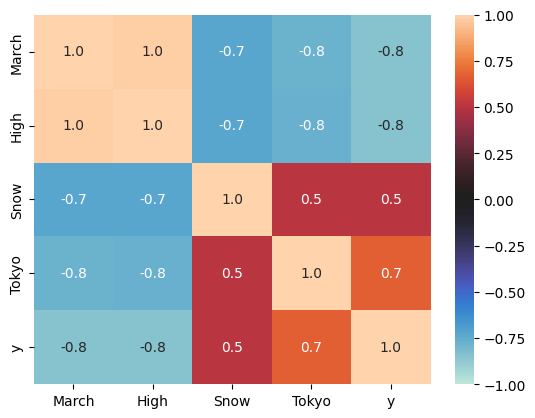

In [ ]:
corr_mat = df.drop(["year"],axis=1).corr(method='pearson')
sns.heatmap(corr_mat,vmin=-1.0,vmax=1.0,center=0,annot=True,fmt='.1f',xticklabels=corr_mat.columns.values,yticklabels=corr_mat.columns.values)
plt.show()

<Figure size 600x600 with 0 Axes>

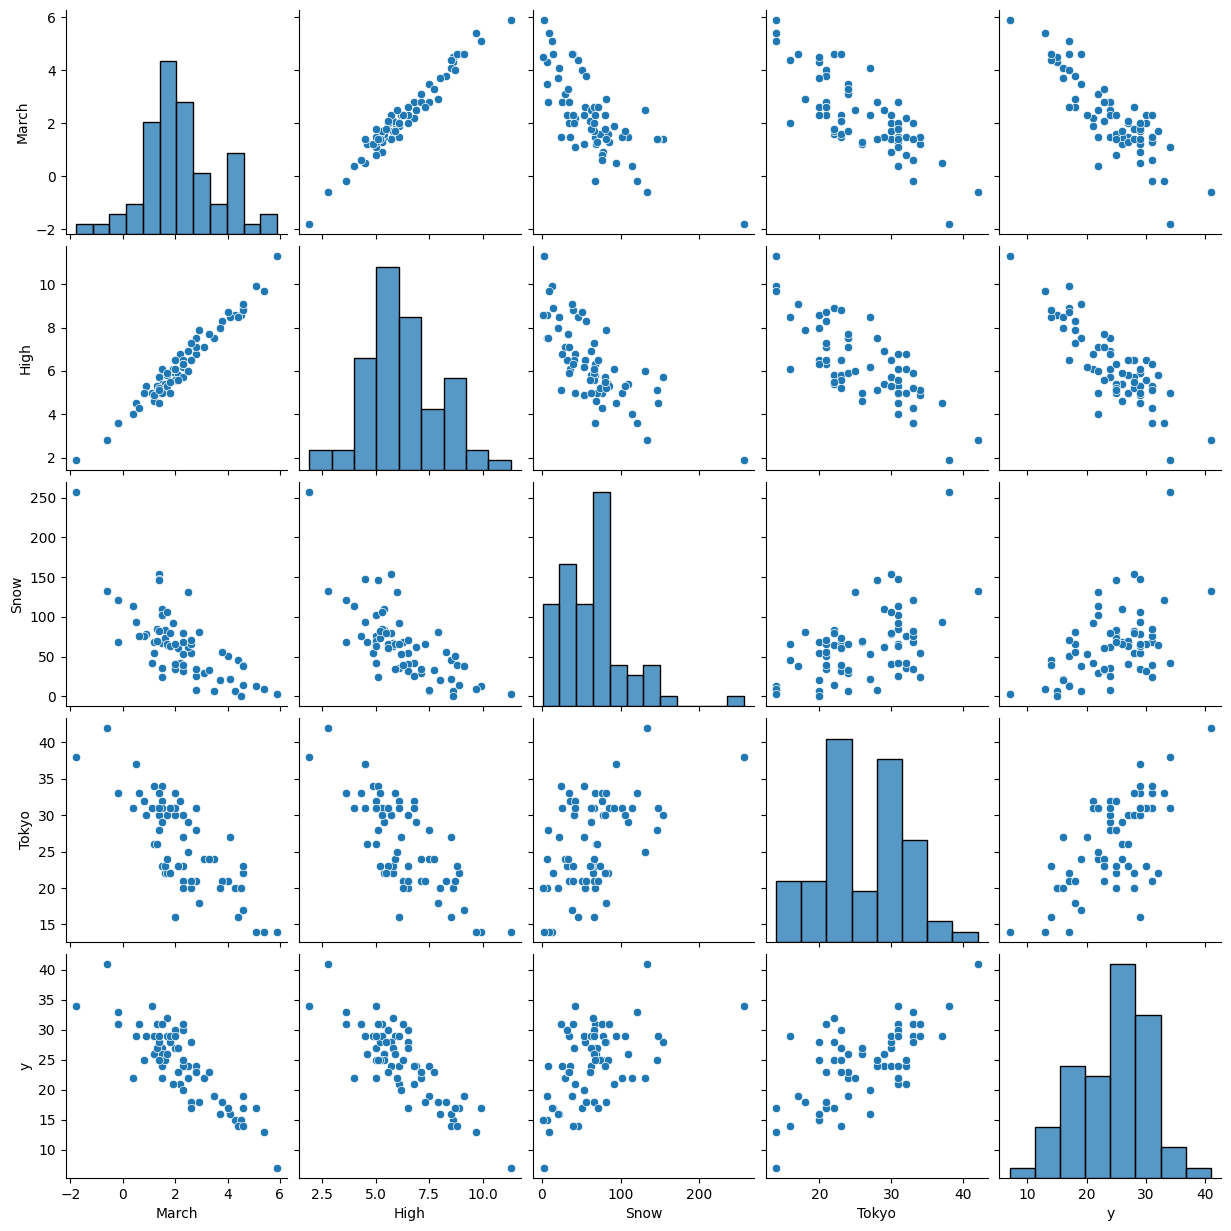

In [ ]:
# 実行
plt.figure(figsize=(6, 6))
sns.pairplot(df.drop(["year"],axis=1))
plt.show()

### 訓練セットとテストセットに分割

ここで一旦、訓練セットdf_trainとテストセットdf_testに分けておきます。

未知のデータを作っておくことで、厳しく評価を行うことができると考えます。

scikit-learnのtrain_test_split()を使って分割します。

In [ ]:
from sklearn.model_selection import train_test_split
X,y = df.drop(["year","y"],axis=1),df["y"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#X_train=X[0:58]
#X_test=X[58:68]
#y_train=y[0:58]
#y_test=y[58:68]

In [ ]:
type(X),X.shape,type(y),y.shape

(pandas.core.frame.DataFrame, (68, 4), pandas.core.series.Series, (68,))

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47, 4), (21, 4), (47,), (21,))

In [ ]:
X_train.head()

,March,High,Snow,Tokyo
11,2.0,6.5,41,30
3,3.5,7.5,7,24
42,4.1,8.5,22,27
10,2.6,6.5,55,20
34,4.5,8.6,1,20


In [ ]:
y_train.head()

11    27
3     19
42    16
10    28
34    15
Name: y, dtype: int64

## 2.1 線形回帰モデルの推定

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_fit = lr.predict(X_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_fit),mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_fit),r2_score(y_test, y_pred)))

MSE train: 9.863, test: 9.403
R^2 train: 0.701, test: 0.805


予測値に対して残差（当てはめ誤差、予測誤差）の散布図をプロットします。

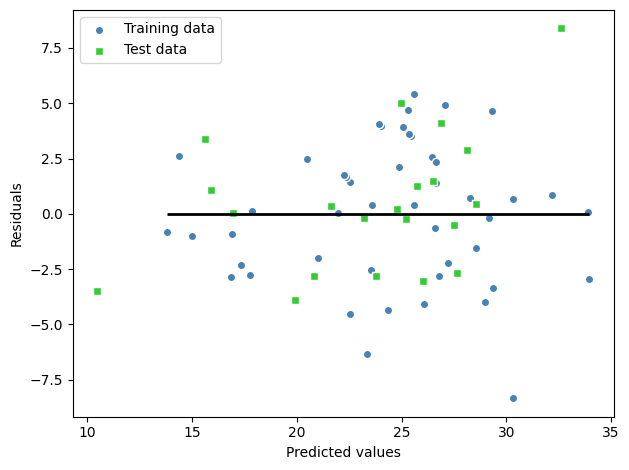

In [ ]:
plt.scatter(y_fit,y_train-y_fit,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_pred,y_test-y_pred,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_fit.min(), xmax=y_fit.max(), color='black', lw=2)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
lr.coef_

array([-3.14224284, -1.21951993, -0.03367894, -0.15270047])

# AutoMLを用いたモデル化




In [ ]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tpot import TPOTRegressor

In [ ]:
tpot = TPOTRegressor(scoring='r2',generations=20,population_size=200,random_state=1625,verbosity=2,n_jobs=-1)
#tpot = TPOTRegressor(scoring='r2',random_state=1625,verbosity=2,n_jobs=-1)

In [ ]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/4200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5660175653037366

Generation 2 - Current best internal CV score: 0.6174159638173814

Generation 3 - Current best internal CV score: 0.6174159638173814

Generation 4 - Current best internal CV score: 0.6174159638173814

Generation 5 - Current best internal CV score: 0.6174159638173814

Generation 6 - Current best internal CV score: 0.6174159638173964

Generation 7 - Current best internal CV score: 0.6174159638173964

Generation 8 - Current best internal CV score: 0.6202235714288594

Generation 9 - Current best internal CV score: 0.6202235714288594

Generation 10 - Current best internal CV score: 0.6202235714288594

Generation 11 - Current best internal CV score: 0.6202235714288594

Generation 12 - Current best internal CV score: 0.6202235714288594

Generation 13 - Current best internal CV score: 0.6202235714288594

Generation 14 - Current best internal CV score: 0.6202235714288596

Generation 15 - Current best internal CV score: 0.626431

TPOTRegressor(generations=20, n_jobs=-1, population_size=200, random_state=1625,
              scoring='r2', verbosity=2)

最終的な検討結果（数理モデル）を知りたい場合には、次のコードを入力し実行します。

In [ ]:
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=SGDRegressor(alpha=0.0,
                                                          fit_intercept=False,
                                                          l1_ratio=0.25,
                                                          learning_rate='constant',
                                                          loss='huber',
                                                          penalty='elasticnet',
                                                          power_t=1.0,
                                                          random_state=1625))),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridgecv', RidgeCV())])

６．検証用データセットを使った予測結果の評価

最後は学習済みモデルの検証です。

検証用データセットをできたモデルで予測してみて、回帰モデルの評価指標の一つである決定係数R2を計算します。

R2が望む性能を満たせば機械学習モデルの作成は完了です。


In [ ]:
y_fit=tpot.predict(X_train)
y_pred = tpot.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_fit),mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_fit),r2_score(y_test, y_pred)))

MSE train: 6.591, test: 8.240
R^2 train: 0.800, test: 0.829


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


具体的にどのように予測され、どのぐらいの精度が出たかを見てみます。

検証データに格納されている正解データ（y_test）と、検証データで予測した結果（y_pred）を散布図で比較してみます。

以下、コードです。

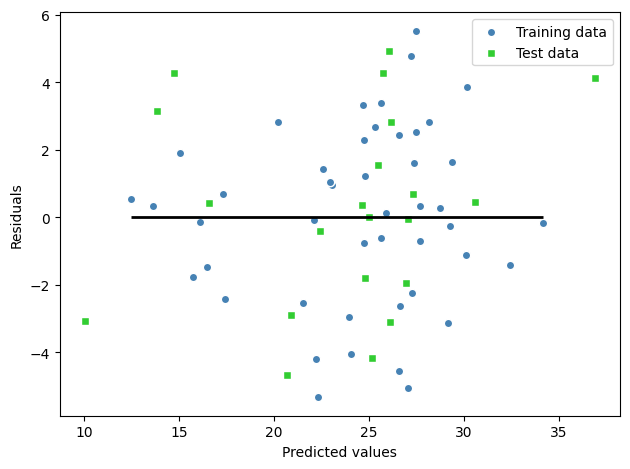

In [ ]:
plt.scatter(y_fit,y_train-y_fit,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_pred,y_test-y_pred,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_fit.min(), xmax=y_fit.max(), color='black', lw=2)
plt.tight_layout()
plt.legend()
plt.show()

やや膨らんでいますが、y_pred=y_testとなる線の付近にプロットされているのがわかります。
 
